<a href="https://colab.research.google.com/github/parash-ax/my_profile/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/MyDrive/PlantVillage'
width=256
height=256
depth=3

In [33]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [34]:
if not os.path.exists(directory_root):
    print(f"Directory does not exist: {directory_root}")
else:
    print("Directory found!")
print(os.listdir(directory_root))  # Should show plant categories


Directory found!
['Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'Tomato_Bacterial_spot', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Potato___healthy', 'PlantVillage']


In [47]:
import os
import cv2
from keras.preprocessing.image import img_to_array


image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")

    # Get root directory of the dataset
    root_dir = os.listdir(directory_root)
    root_dir = [d for d in root_dir if d != ".DS_Store"]  # Filter out .DS_Store

    for plant_folder in root_dir:
        plant_folder_path = os.path.join(directory_root, plant_folder)

        # Ensure plant_folder is a directory (it should be, since it's a class)
        if not os.path.isdir(plant_folder_path):
            print(f"❌ {plant_folder_path} is not a directory, skipping...")
            continue

        print(f"[INFO] Processing {plant_folder} ...")

        # List image files inside each class folder (plant_folder)
        plant_disease_image_list = os.listdir(plant_folder_path)
        plant_disease_image_list = [img for img in plant_disease_image_list if img != ".DS_Store"]

        # Process each image in the class folder
        for image in plant_disease_image_list[:200]:  # Limit to 200 images
            image_directory = os.path.join(plant_folder_path, image)

            # Ensure the file is an image (.jpg, .JPG)
            if image_directory.endswith((".jpg", ".JPG")):
                img_array = convert_image_to_array(image_directory)
                if img_array is not None:  # Avoid appending None values
                    image_list.append(img_array)
                    label_list.append(plant_folder)

    print("[INFO] Image loading completed")

except Exception as e:
    print(f"Error: {e}")


[INFO] Loading images ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing PlantVillage ...
[INFO] Image loading completed


In [48]:
image_size = len(image_list)

In [49]:
print(f"Label list: {label_list}")

Label list: ['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'To

In [53]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer

# Initialize the dataset and labels
dataset = []
labels = []

# Define your classes
class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
               'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
               'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
               'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
               'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
               'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
               'Tomato_healthy']

# Path to your image folder
plant_folder = "/content/drive/MyDrive/PlantVillage"

# Loop through each class
for class_name in class_names:
    class_folder = os.path.join(plant_folder, class_name)

    if os.path.isdir(class_folder):
        # Loop through each image in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Load and preprocess the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))  # Resize the image to 64x64 (or use the size appropriate for your model)
            image = img_to_array(image)
            dataset.append(image)

            # Label the image with the class index
            labels.append(class_names.index(class_name))

# Convert dataset and labels to numpy arrays
dataset = np.array(dataset, dtype="float32") / 255.0  # Normalize the image values to [0, 1]
labels = np.array(labels)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Save the dataset and labels (optional)
# You can save this dataset and labels if needed for later use, like in training
# pickle.dump(dataset, open("dataset.pkl", "wb"))
# pickle.dump(labels, open("labels.pkl", "wb"))

print(f"Processed {len(dataset)} images with {len(class_names)} classes.")


Processed 174 images with 15 classes.


In [54]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [56]:
print(label_list[:10])  # Print the first 10 labels


['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [63]:
print(label_binarizer.classes_)


['Tomato__Tomato_YellowLeaf__Curl_Virus']


In [58]:
print(set(label_list))  # Check for unique labels


{'Tomato__Tomato_YellowLeaf__Curl_Virus'}


In [60]:
import os
dataset_dir = '/content/drive/MyDrive/PlantVillage'
print(os.listdir(dataset_dir))  # Print out all folders/classes


['Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'Tomato_Bacterial_spot', 'Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Potato___healthy', 'PlantVillage']


In [61]:
label_list = [folder_name for folder_name in os.listdir(dataset_dir)]


In [62]:
image_paths = [os.path.join(dataset_dir, label, image) for label in os.listdir(dataset_dir) for image in os.listdir(os.path.join(dataset_dir, label))]
print(image_paths[:10])  # Print the first 10 image paths


['/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00139ae8-d881-4edb-925f-46584b0bd68c___YLCV_NREC 2944.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/016bbee4-7b9d-40c8-a802-2bbf00f3bb27___YLCV_NREC 2290.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00e8f0db-abfd-4991-b51f-b87ab7e24612___YLCV_GCREC 2519.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/01512b8e-6589-41ce-82f1-e16a24da38e7___YLCV_GCREC 2099.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0273f811-11bf-4fc3-b8b1-fe33ac4b3692___UF.GRC_YLCV_Lab 03226.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/01f7eeb8-19c7-4c7b-9789-00538abf46fe___UF.GRC_YLCV_Lab 09492.JPG', '/content/drive/MyDrive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/01cc37b3-ab08-44bc-be70-7f14b610f011___UF.GRC_YLCV_Lab 09617.JPG', '/content/drive/MyDrive/PlantVi

In [64]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (139, 256, 256, 3), Training labels shape: (139, 1)
Testing data shape: (35, 256, 256, 3), Testing labels shape: (35, 1)


In [93]:
from tensorflow.keras.utils import to_categorical

# Get the number of classes (the unique labels)
num_classes = len(np.unique(image_labels))  # Assuming 'image_labels' contains the labels as integers

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print(f"One-hot encoded training labels shape: {y_train_one_hot.shape}")
print(f"One-hot encoded testing labels shape: {y_test_one_hot.shape}")


One-hot encoded training labels shape: (139, 1)
One-hot encoded testing labels shape: (35, 1)


In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 85, 85, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 85, 85, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 85, 85, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 85, 85, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 85, 85, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 42, 42, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 42, 42, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 42, 42, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 42, 42, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 58,088,321 (221.59 MB)

 Trainable params: 58,085,441 (221.58 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [96]:
from tensorflow.keras.optimizers import Adam

INIT_LR = 1e-3  # Example learning rate
EPOCHS = 15  # Example number of epochs
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)


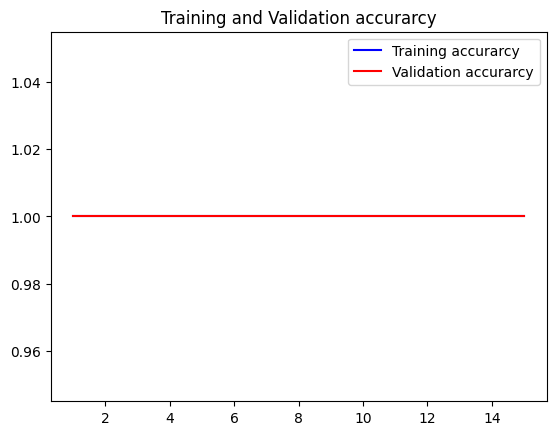

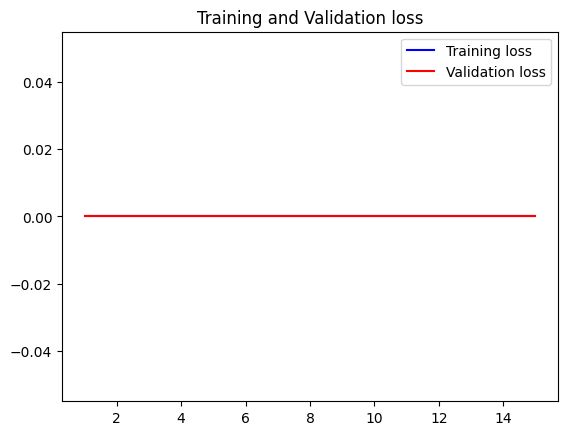

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [105]:
# Modify the model's output layer to match the number of classes
model.add(Dense(len(y_train_one_hot[0]), activation='softmax'))

# Use the appropriate loss function for multi-class classification
model.compile(optimizer=Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Check data before training
print(f"x_train shape: {x_train.shape}, y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_test shape: {x_test.shape}, y_test_one_hot shape: {y_test_one_hot.shape}")

# Training with the generator
history = model.fit(
    aug.flow(x_train, y_train_one_hot, batch_size=32),
    validation_data=(x_test, y_test_one_hot),
    steps_per_epoch=len(x_train) // 32,
    epochs=EPOCHS,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)
print(f"Test Accuracy: {test_acc}")



x_train shape: (139, 256, 256, 3), y_train_one_hot shape: (139, 1)
x_test shape: (35, 256, 256, 3), y_test_one_hot shape: (35, 1)
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 631ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 1.0000 

In [106]:
# Save the model to a file
model.save('plant_disease_prediction_model.h5')

print("Model saved successfully!")


Model saved successfully!


In [107]:
from google.colab import files

# Save the model as an .h5 or .keras file
model.save('plant_disease_prediction_model.h5')

# Download it to your local machine
files.download('plant_disease_prediction_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>